In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#### Reading and checking data

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.shape

(730, 16)

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Removing columns which are not useful for us
- instant : Adds no value, and is only index values.
- dteday : As we have columns as "yr" and "mnth", this column adds no extra information.
- casual and registered : Because we are only concered about the total number of riders, which we have in "cnt", and not what type of riders, we can drop these columns.

In [7]:
bike.drop(["instant","dteday","casual","registered"], axis=1, inplace=True)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike.isnull().sum() #No null values

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Visualising Numeric values

<Figure size 1080x2160 with 0 Axes>

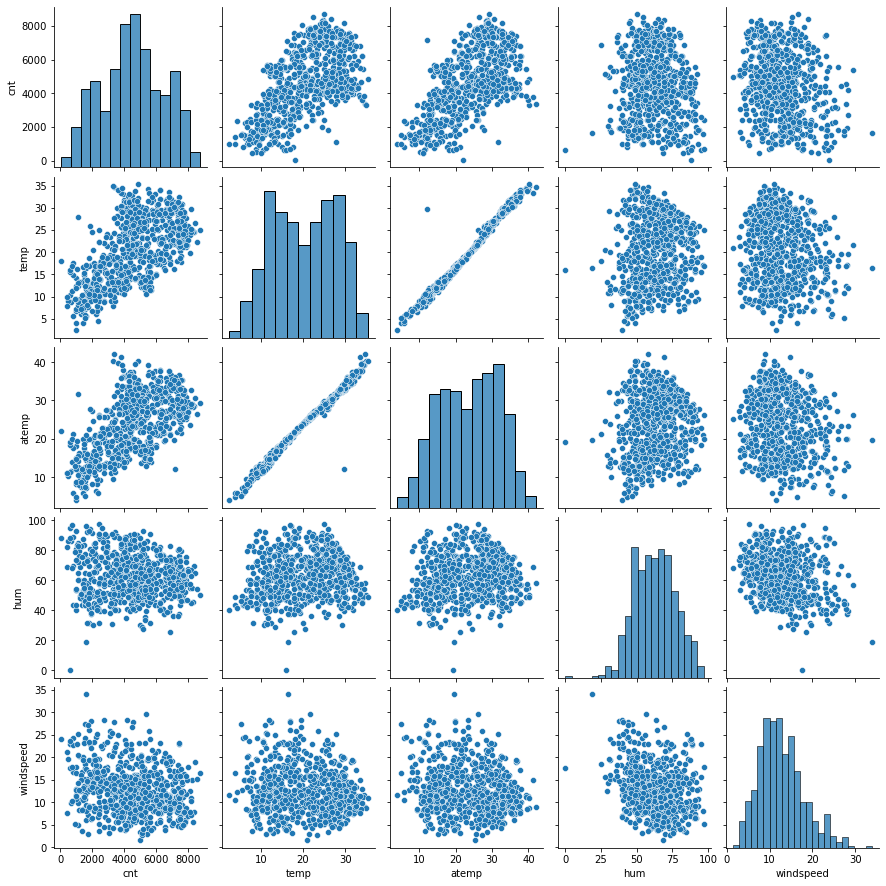

In [10]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualising Categorical values

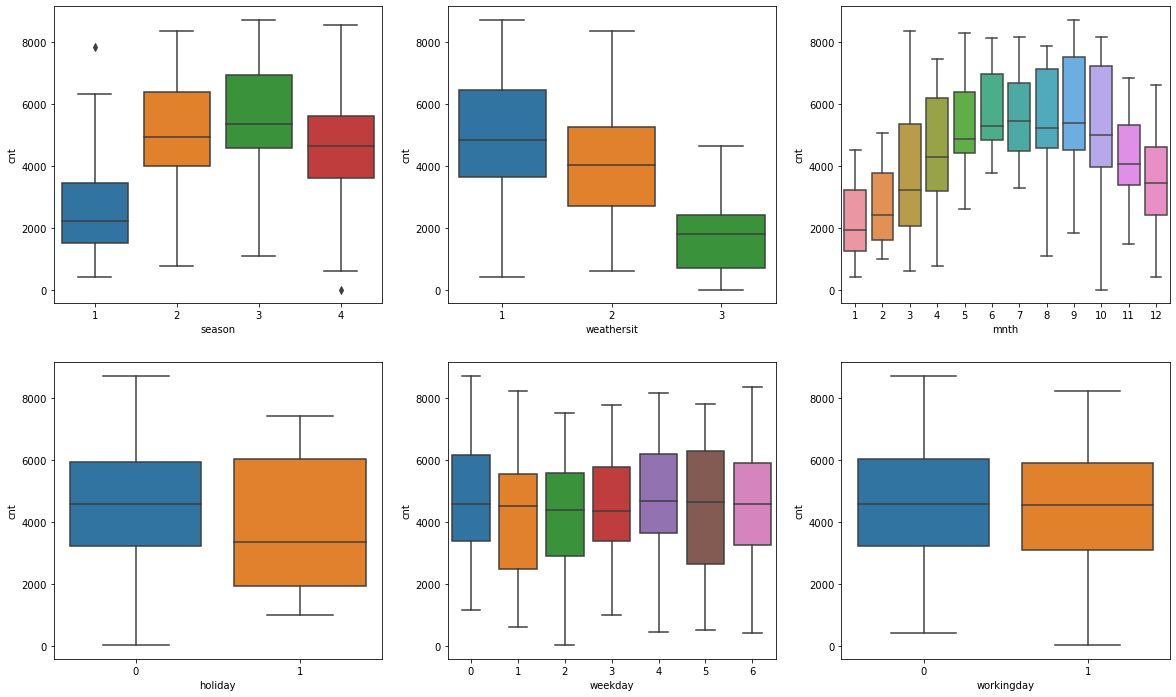

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Insights
- Season : Season 1 has the lowest median, whereas season 2 and 3 are the most popular ones
- Weathersit : Weather 1 has the highest median, followed by 2 and 3
- Months : Months between 5-10, i.e. May-Oct are the most popular ones
- Holiday : Even though medians differ but the max values remains the same
- Weekday : All medians remain the same
- workingday : Seems like no effect on number

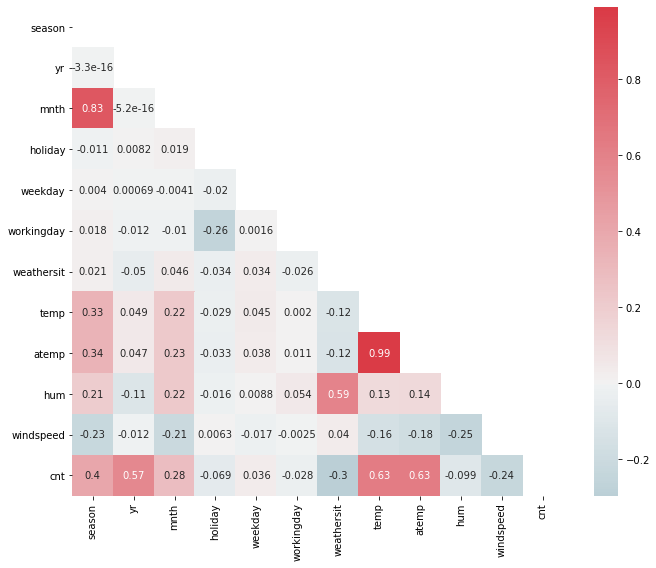

In [12]:
corr= bike.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
heatmap = sns.heatmap(corr,mask=mask,cmap=cmap,center=0,annot=True)

In [13]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### Model Building

In [15]:
y=bike.pop('cnt')
X=bike
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Checking the values before scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,13.188347,16.22460,62.0417,10.250129,0,0,1,...,0,0,0,0,0,1,0,0,1,0
645,1,1,0,15.716653,19.38040,70.9583,12.708493,0,0,1,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,26.035000,30.08270,49.4583,20.458450,1,0,0,...,0,0,0,1,0,0,0,1,0,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,0,0,0,...,1,0,0,0,1,0,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [17]:
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [19]:
# Checking values after scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.685963,0.509660,0.708724,1,0,0,...,0,0,0,1,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0,0,0,...,1,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [20]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [21]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 2),
 ('mnth_4', False, 16),
 ('mnth_5', False, 5),
 ('mnth_6', False, 10),
 ('mnth_7', True, 1),
 ('mnth_8', False, 13),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 8),
 ('weekday_3', False, 7),
 ('weekday_4', False, 15),
 ('weekday_5', False, 14),
 ('weekday_6', False, 12),
 ('weathersit_1', True, 1),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_1', 'weathersit_3'],
      dtype='object')

In [23]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [24]:
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_1,weathersit_3
683,1,0,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,1,0,0,0
645,1,1,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0
163,0,0,0.717562,0.685963,0.509660,0.708724,1,0,0,0,0,0,0,1,0
360,0,0,0.331287,0.326273,0.785745,0.415925,0,0,0,0,0,0,1,0,0
640,1,0,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0.405237,0.395131,0.543468,0.621696,0,0,0,0,0,0,0,1,0
106,0,0,0.495350,0.481247,0.494203,0.704080,1,0,0,0,0,0,0,1,0
270,0,0,0.717562,0.651183,0.874624,0.316186,0,0,1,0,1,0,0,0,0
435,1,0,0.507811,0.499487,0.504079,0.464173,0,0,0,0,0,0,0,1,0


#### Manual elimination

In [25]:
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [26]:
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [27]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          3.11e-185
Time:                        22:44:38   Log-Likelihood:                -4126.0
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     495   BIC:                             8352.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1542.4013    301.891      5.109   

#### Model 2

In [28]:
#droping 'atemp' based on its High VIF value
col = col.drop(["atemp"])
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_1',
       'weathersit_3'],
      dtype='object')

In [29]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.23e-186
Time:                        22:44:39   Log-Likelihood:                -4127.0
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1569.0424    301.634      5.202   

#### Model 3
Droping 'hum' based on its Very High 'VIF' value.
Not removing 'temp' because of high correlation seen earlier with 'cnt'

In [30]:
col = col.drop(["hum"])
col

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12', 'weathersit_1',
       'weathersit_3'],
      dtype='object')

In [31]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.31e-183
Time:                        22:44:41   Log-Likelihood:                -4135.9
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          518.3515    169.806      3.053   

#### Model 4
Droping 'season_3' based on its Very High 'VIF' value.
Not removing 'temp' because of high correlation seen earlier with 'cnt'

In [32]:
col = col.drop(["season_3"])

In [33]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.93e-178
Time:                        22:44:42   Log-Likelihood:                -4150.3
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     498   BIC:                             8382.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          305.4789    169.690      1.800   

#### Model 5
Droping 'mnth_7' based on its Very High p-value

In [34]:
col = col.drop(["mnth_7"])
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.96e-179
Time:                        22:44:43   Log-Likelihood:                -4150.7
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     499   BIC:                             8376.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          329.5415    167.603      1.966   

#### Now that our adjusted R-squared does not seem to change, and the p-values are less than 0.05, and VIF are less than 5, all seems good with the model

### Residual Analysis of the train data

In [35]:
X_train_rfe = X_train[col]

In [36]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [37]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

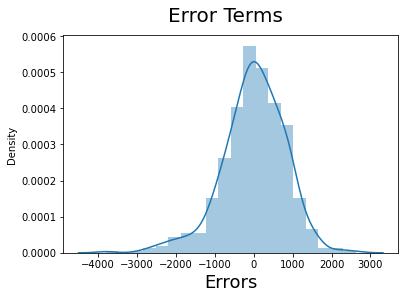

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

#### Our assumption for linear regression is valid because all our residual errors are normally distributed, and the mean is zero

### Making Predictions Using the Final Model

In [39]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [40]:
lr = build_model_sk(X_train[col],y_train)
print(lr.intercept_,lr.coef_)

329.5414900877631 [ 1990.37249419  -718.3478223   4734.48950759  -829.22575174
   783.9432056   1448.89833309   768.98508936  -419.44772917
  -464.17908506   679.98293386 -1469.44180325]


In [41]:
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [42]:
y_test_pred = lr.predict(X_test[col])

In [43]:
r2_score(y_test,y_test_pred)

0.8185116148056277

Text(0, 0.5, 'y_test_pred')

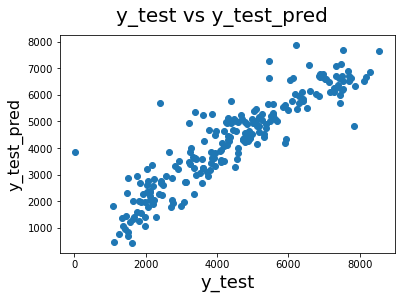

In [44]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

In [45]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
r2=0.8185116148056277
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7895507022746109

## Comparing Results

- Train R-squared :0.823
- Train Adjusted R-squared :0.819
- Test R-squared :0.818
- Test Adjusted R-squared :0.789

## Conclusion
- Summer and winter are good seasons where the demand of bikes are good, thus the company should focus more on spring and fall to increase it's demand there.
- Months like Nov and Dec needs more attention because they have the lowest sales and affects negatively to the growth of the company
- Temperature plays a very big role in sales and demands

Major variables to predict demand of bikes are:
- Temperature
- Holiday
- Windspeed
- Season
- Months (Positive: September ; Negative: November, December)
- Weather ( Positive: Clear, Few clouds, Partly cloudy, Partly cloudy ; Negative: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)